# Generic Backend
Generate simulated distributed backend with no noise from the coupling map

In [40]:
# Import function to build coupling map from file
from lib.distributed_coupling_map import (
    build_coupling_list_ring,
    build_coupling_list_full,
    build_coupling_list_line,
    build_coupling_list_grid,
    build_coupling_list_t_horizontal,
    build_coupling_list_t_vertical,
)

In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_circuit_layout, plot_coupling_map, plot_histogram

In [42]:
def calculate_physical_neighbors(coupling_map: CouplingMap):
        return {
            qubit: list(iter(coupling_map.neighbors(qubit)))
            for qubit in coupling_map.physical_qubits
        }

def calculate_physical_connectivity(
         coupling_map: CouplingMap
    ):  # the total number of edges per node in coupling map
        return {
            qubit: len(list(coupling_map.neighbors(qubit)))
            for qubit in coupling_map.physical_qubits
        }

neighbors: {0: 2, 1: 2, 2: 2, 3: 2, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 2}


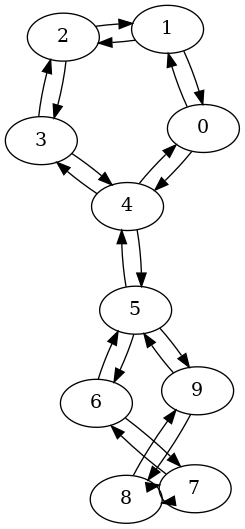

In [43]:
# coupling map structure ring
num_qubits = 5
num_group = 2

coupling_list_ring = build_coupling_list_ring(num_qubits, num_group)
cm_ring = CouplingMap(couplinglist=coupling_list_ring)
print("neighbors:", calculate_physical_connectivity(cm_ring))
display(cm_ring.draw()) # for graphviz

# Example

Build `GenericBackendV2` with provided coupling map

In [44]:
gen_backend = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_list_ring)

Run a quantum circuit with GHZ state on 3 virtual qubits

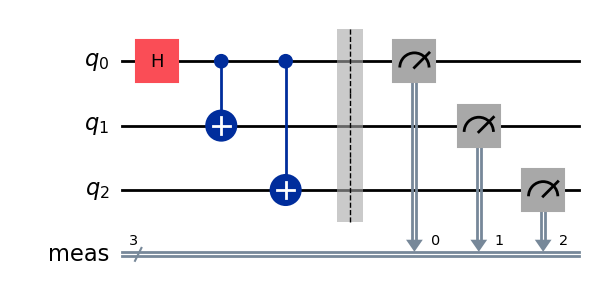

In [45]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()
display(qc.draw('mpl'))

Plot virtual on physical qubits:


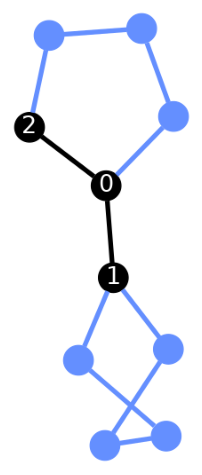

Plot used physical qubits:


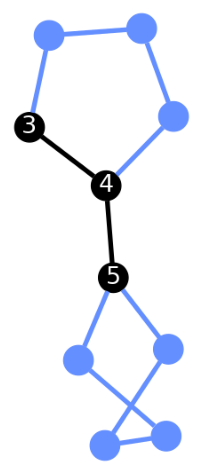

In [46]:
gen_backend = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_list_ring)
transpiled_qc = transpile(qc, gen_backend)
print("Plot virtual on physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='virtual'))
print("Plot used physical qubits:")
display(plot_circuit_layout(transpiled_qc, gen_backend, view='physical'))

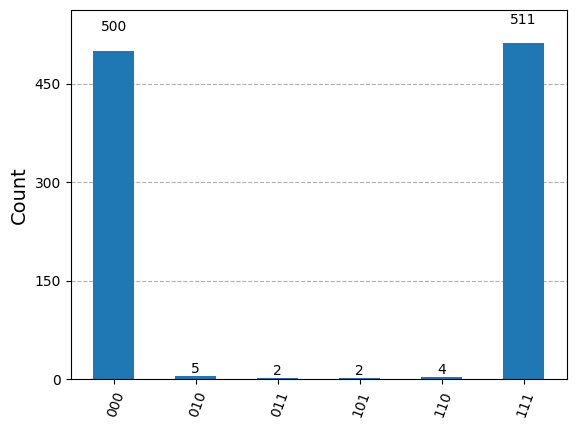

In [47]:
job = gen_backend.run(transpiled_qc)
counts = job.result().get_counts()
display(plot_histogram(counts))

neighbors: {0: 4, 1: 4, 2: 4, 3: 4, 4: 5, 5: 5, 6: 4, 7: 4, 8: 4, 9: 4}


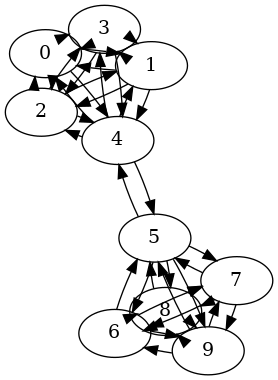

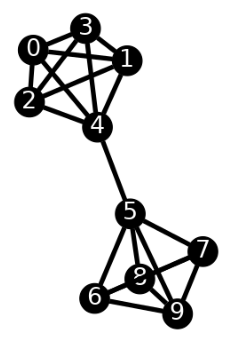

In [48]:
coupling_list_full = build_coupling_list_full(num_qubits=5, num_group=2)
cm_full = CouplingMap(couplinglist=coupling_list_full)
print("neighbors:", calculate_physical_connectivity(cm_full))
display(cm_full.draw()) #graphviz dependency

qc_full = QuantumCircuit(num_qubits*num_group)
backend_full = GenericBackendV2(num_qubits=num_qubits*num_group, coupling_map=cm_full)
transpile_full = transpile(qc_full, backend_full)
display(plot_circuit_layout(transpile_full, backend_full))

If graphviz dependency is not installed, follow cell above to create `GenericBackendV2` and transpile the quantum circuit

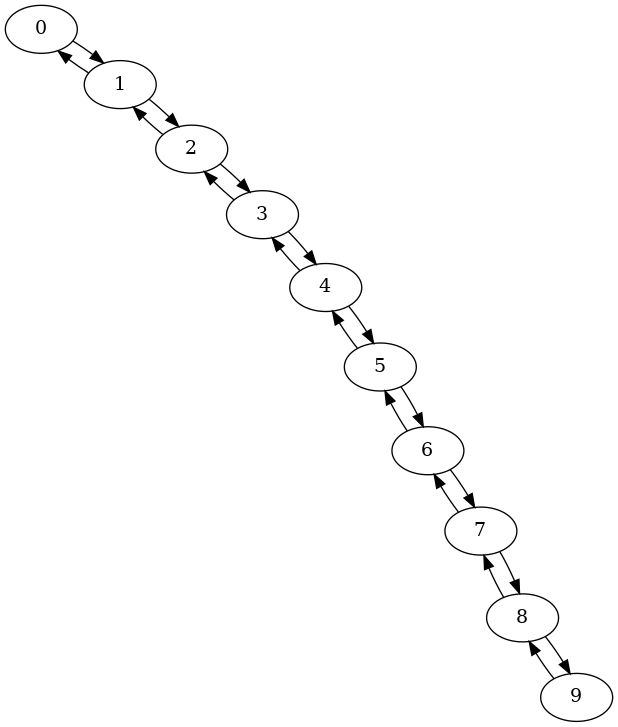

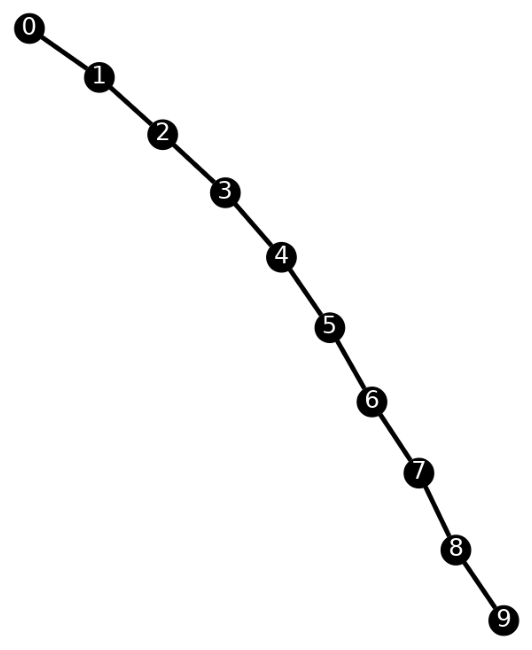

In [49]:
couplinglist = build_coupling_list_line(num_qubits=5, num_group=2)
cm = CouplingMap(couplinglist=couplinglist)
display(cm.draw())

qc = QuantumCircuit(num_qubits*num_group)
backend = GenericBackendV2(num_qubits=num_qubits*num_group, coupling_map=cm)
transpiledqc = transpile(qc, backend)
display(plot_circuit_layout(transpiledqc, backend))

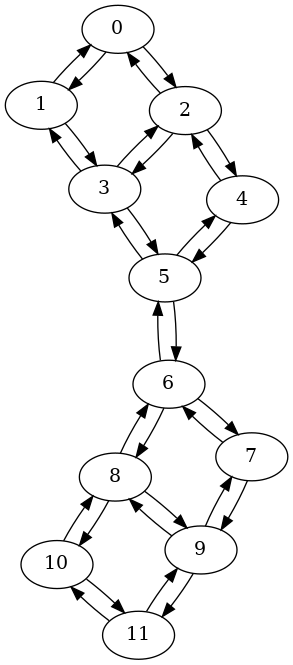

In [50]:
coupling_list_grid = build_coupling_list_grid(num_rows=3, num_columns=2, num_group=2)
cm_grid = CouplingMap(couplinglist=coupling_list_grid)
display(cm_grid.draw())

'T' coupling map representation taken from [`FakeLondonV2`](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeLondonV2)  
$0 ↔ 1 ↔ 2$  
$\ \ \ \ \ \ \ \ ↕  $  
$\ \ \ \ \ \ \ \ 3  $  
$\ \ \ \ \ \ \ \ ↕  $  
$\ \ \ \ \ \ \ \ 4  $  

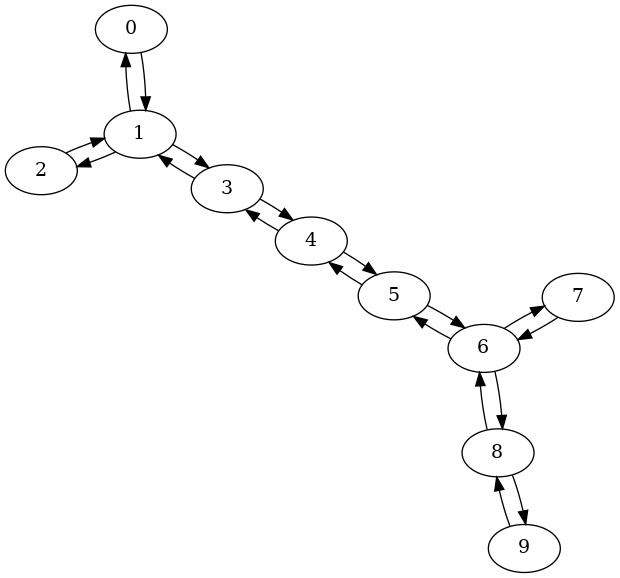

In [51]:
# connect from the end of logical qubit q4
coupling_list_t_horizontal = build_coupling_list_t_horizontal(num_group=2) 
cm_t_horizontal = CouplingMap(couplinglist=coupling_list_t_horizontal)
display(cm_t_horizontal.draw())

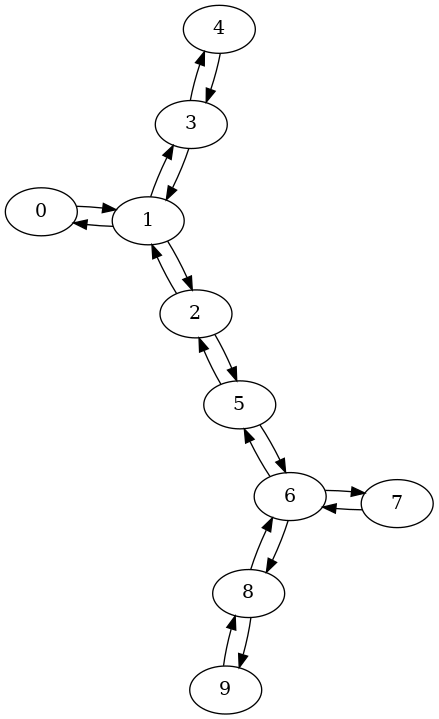

In [52]:
# connect from logical qubit q2
coupling_list_t_vertical = build_coupling_list_t_vertical(num_group=2)
cm_t_vertical = CouplingMap(couplinglist=coupling_list_t_vertical)
display(cm_t_vertical.draw())

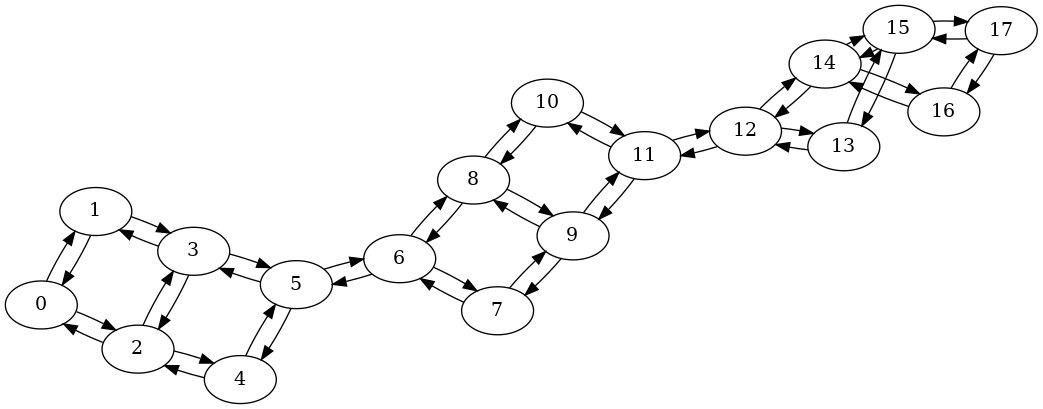

In [53]:
import math

grid_qubits = 6
grid_group = 3

couplinglist = build_coupling_list_grid(
            num_rows=math.ceil(math.sqrt(grid_qubits)),
            num_columns=math.floor(math.sqrt(grid_qubits)),
            num_group=grid_group,
        )

cm = CouplingMap(couplinglist)
cm.draw()